In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
base_dir = 'OpenSecrets/CampaignFin16'

In [3]:
# Get individual contributions
individual_stub = base_dir + '/indivs/indivs16.part.{}.csv'
df_list = []
for i in range(0, 20):
    print(i)
    tmp = pd.read_csv(individual_stub.format(i), sep=";")
    df_list.append(tmp)
ind_df = pd.concat(df_list)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [4]:
ind_df.head()

,year,name,CID,job,city,state,sex,jobTitle,employer,date,amount
0,2016,"MORGAN, BARBARA",N00000036,Retired,MORGANTON,NC,F,NOT EMPLOYED,NOT EMPLOYED,02/26/2015,25.0
1,2016,"PARTER, SEYMOUR",N00000036,Retired,MADISON,WI,M,NOT EMPLOYED,NOT EMPLOYED,02/26/2015,5.0
2,2016,"CAMPBELL, DANIEL",N00000036,St Luke's Hospital,DULUTH,MN,M,PHYSICIAN,ST. LUKE'S HOSPITAL,02/26/2015,1.0
3,2016,"HOMB, GRACE",N00000036,Retired,MADISON,WI,F,NOT EMPLOYED,NOT EMPLOYED,02/26/2015,25.0
4,2016,"HOPWOOD, MARGARET",N00000036,Retired,MILWAUKEE,WI,F,RETIRED EPIDEMIOLOGIST,RETIRED,02/26/2015,25.0


In [5]:
# Get pac contributions
pac_df = pd.read_csv('OpenSecrets/CampaignFin16/PAC/pacs16.part.0.csv', sep=';')
pac_df.head()

,year,PACid,CID,amount,donataiondate,district
0,2016,C00002469,N00033508,5000,06/21/2016,H2CA15094
1,2016,C00125641,N00030071,1500,04/06/2016,H8OR05107
2,2016,C00331173,N00003682,1000,09/15/2016,S0OH00133
3,2016,C00235572,N00002593,5000,03/30/2015,S6GA00119
4,2016,C00114025,N00035403,2500,09/29/2016,H4FL26038


In [6]:
ind_df['from'] = 'i'
pac_df['from'] = 'p'

In [7]:
# Comine two dfs
df = pd.concat([ind_df[['CID', 'amount', 'from']], pac_df[['CID', 'amount', 'from']]])
df.head()

,CID,amount,from
0,N00000036,25.0,i
1,N00000036,5.0,i
2,N00000036,1.0,i
3,N00000036,25.0,i
4,N00000036,25.0,i


In [8]:
ind_df['amount'][ind_df['amount'] > 0].describe()

count    1.899766e+07
mean     3.272980e+02
std      1.817644e+04
min      1.000000e+00
25%      2.000000e+01
50%      4.000000e+01
75%      1.000000e+02
max      5.000000e+07
Name: amount, dtype: float64

In [9]:
sources = df.groupby(['CID', 'from']).sum()

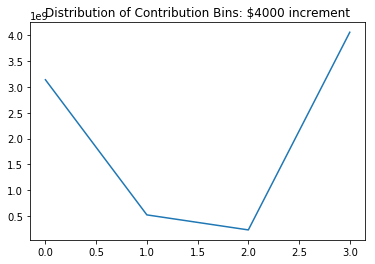

In [17]:
x = df['amount']
i = 4000
data = [x[x < i].sum(), x[(x > i) & (x < (2 * i))].sum(), x[(x > (2 * i)) & (x < (3 * i))].sum(), x[x > (3 * i)].sum()]
plt.plot(data)
plt.title("Distribution of Contribution Bins: ${} increment".format(i))
plt.show()

In [18]:
cid_dict = {cid: {} for cid in df['CID'].unique()}
cid_dict

{nan: {},
 'C00424366': {},
 'N00001971': {},
 'N00038458': {},
 'C00520080': {},
 'C00571091': {},
 'N00039792': {},
 'C00565028': {},
 'C00478800': {},
 'N00035487': {},
 'C00565499': {},
 'C00382424': {},
 'C00024752': {},
 'C00188367': {},
 'N00033549': {},
 'C00621318': {},
 'C00620500': {},
 'N00026651': {},
 'C00389189': {},
 'C00568667': {},
 'C00287847': {},
 'C00616912': {},
 'C00422774': {},
 'C00530766': {},
 'C00531624': {},
 'N00000078': {},
 'C00460485': {},
 'N00039372': {},
 'C00496596': {},
 'C00211318': {},
 'N00035238': {},
 'N00037293': {},
 'C00614370': {},
 'C00585885': {},
 'N00039863': {},
 'C00427401': {},
 'C00426874': {},
 'C00010439': {},
 'C00567172': {},
 'N00039985': {},
 'N00027514': {},
 'C00569251': {},
 'N00002713': {},
 'C00005660': {},
 'C00567685': {},
 'C00364109': {},
 'C00549014': {},
 'C00278895': {},
 'N00008086': {},
 'C00111534': {},
 'C00481192': {},
 'C00517037': {},
 'C00360354': {},
 'C00549303': {},
 'C00491183': {},
 'C00577213': {},


In [19]:
count = 0
for cid, amt in zip(df['CID'], df['amount']):
    count += 1
    if count % 1000000 == 0:
        print(count)
    if amt > 0:
        group = amt // 500
        if group not in cid_dict[cid]:
            cid_dict[cid][group] = 0
        cid_dict[cid][group] += amt

1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
18000000
19000000


In [21]:
cid_dict_list = []
for cid in cid_dict:
    cid_dict_list.append({'cid': cid, **cid_dict[cid]})
cid_dict_list[1]

{0.0: 700.0,
 1.0: 3600.0,
 2.0: 6000.0,
 'cid': 'C00424366',
 4.0: 4400.0,
 3.0: 4500.0,
 10.0: 5000.0}

In [35]:
binned_contributions = pd.DataFrame.from_records(cid_dict_list)
binned_contributions = binned_contributions[binned_contributions['cid'] != np.NaN]
binned_contributions.head()

,0.0,1.0,2.0,3.0,4.0,5.0,8.0,9.0,10.0,11.0,...,3133.0,1899.0,2943.0,402.0,2505.0,2781.0,1247.0,747.0,1260.0,553.0
0,3361.0,5402.0,9093.0,3000.0,2369.0,21339.0,4005.0,4700.0,25901.0,5632.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,700.0,3600.0,6000.0,4500.0,4400.0,NaN,NaN,NaN,5000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30804.0,84200.0,232300.0,45200.0,80174.0,450900.0,20000.0,NaN,176200.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,800.0,500.0,3000.0,NaN,4000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1364.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
def get_pac(x):
    try:
        x = sources.ix[(x, 'p')]
        return x['amount']
    except:
        return 0

In [39]:
median = ind_df.groupby('CID')['amount'].median()
mean = ind_df.groupby('CID')['amount'].mean()
binned_contributions['median'] = binned_contributions['cid'].apply(lambda x: median[str(x)])
binned_contributions['mean'] = binned_contributions['cid'].apply(lambda x: mean[str(x)])
binned_contributions['individual'] = binned_contributions['cid'].apply(lambda x: sources.ix[(x, 'i')])

binned_contributions['pac'] = binned_contributions.index.map(lambda x: get_pac(x))

KeyError: 'nan'

In [197]:
binned_individual_contributions.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,cid,median,mean,individual,pac
0,8899.0,17822.0,60350.0,12670.0,4100.0,70207.0,600.0,5950.0,875.0,0.0,...,0.0,0.0,0.0,0.0,33600.0,N00037287,250.0,301.097849,280021.0,500.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,92769.0,N00035833,7500.0,10307.666667,92769.0,0.0
2,0.0,0.0,0.0,0.0,0.0,500.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,C00089987,750.0,750.000000,1500.0,0.0
3,784.0,1461.0,4826.0,661.0,0.0,3000.0,0.0,0.0,0.0,0.0,...,0.0,1776.0,0.0,0.0,2700.0,N00039870,100.5,246.439024,20208.0,1420.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10000.0,C00590455,5000.0,5000.000000,10000.0,0.0


In [198]:
binned_individual_contributions.to_csv("2016-binned.csv", index=False)

In [70]:
count = 0
cid_dict_list = []
for cid in cid_dict:
    count += 1
    if count % 1000 == 0:
        print(count)
    this_dict = {'cid': cid}
    for i in range(21):
        if i not in cid_dict[cid]:
            this_dict[i] = 0
        else:
            this_dict[i] = cid_dict[cid][i]
    cid_dict_list.append(this_dict)
# [{'cid': cid, **{k: cid_dict[cid][k] for k in range(0,11)}} for cid in cid_dict]
cid_dict_list

1000
2000
3000
4000
5000
6000
7000


[{0: 8899.0,
  1: 17822.0,
  2: 60350.0,
  3: 12670.0,
  4: 4100.0,
  5: 70207.0,
  6: 600.0,
  7: 5950.0,
  8: 875.0,
  9: 0,
  10: 58000.0,
  11: 0,
  12: 0,
  13: 0,
  14: 0,
  15: 13500.0,
  16: 0,
  17: 0,
  18: 0,
  19: 0,
  20: 33600.0,
  'cid': 'N00037287'},
 {0: 0,
  1: 0,
  2: 0,
  3: 0,
  4: 0,
  5: 0,
  6: 0,
  7: 0,
  8: 0,
  9: 0,
  10: 0,
  11: 0,
  12: 0,
  13: 0,
  14: 0,
  15: 0,
  16: 0,
  17: 0,
  18: 0,
  19: 0,
  20: 92769.0,
  'cid': 'N00035833'},
 {0: 0,
  1: 0,
  2: 0,
  3: 0,
  4: 0,
  5: 500.0,
  6: 0,
  7: 0,
  8: 0,
  9: 0,
  10: 1000.0,
  11: 0,
  12: 0,
  13: 0,
  14: 0,
  15: 0,
  16: 0,
  17: 0,
  18: 0,
  19: 0,
  20: 0,
  'cid': 'C00089987'},
 {0: 784.0,
  1: 1461.0,
  2: 4826.0,
  3: 661.0,
  4: 0,
  5: 3000.0,
  6: 0,
  7: 0,
  8: 0,
  9: 0,
  10: 5000.0,
  11: 0,
  12: 0,
  13: 0,
  14: 0,
  15: 0,
  16: 0,
  17: 1776.0,
  18: 0,
  19: 0,
  20: 2700.0,
  'cid': 'N00039870'},
 {0: 0,
  1: 0,
  2: 0,
  3: 0,
  4: 0,
  5: 0,
  6: 0,
  7: 0,
  8: 0,
  